<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Josefa Anselmo.
- Nombre de alumno 2: Tamara Carrasco.


### **Link de repositorio de GitHub:** [TamoJosha](https://github.com/Tamaracarrasco/TamoJosha-Lab-de-Prog-MDS-Prim2025/tree/main)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
!pip install xgboost

In [3]:
# Inserte su código aquí

### importación de librerías importantes

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Holdout 
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder

# Modelo
import xgboost as xgb
from xgboost import XGBClassifier

# Métricas
from sklearn.metrics import classification_report



In [4]:
## Exploración de los datos

# Dimensión
print(" Dimensiones del dataset: ", df.shape)

# Columnas
print("="*40)
print("Columnas numéricas: \n", df.select_dtypes(include="number").columns.tolist())
print("\n Columnas tipo category u object: ", df.select_dtypes(include=[
    "object", "category"
                        ]
                ).columns.tolist()
    )

# Valores duplicados
print("="*40)
print(" Valores duplicados en todas las columnas: ", df.duplicated().sum())

# Valores nulos
print("="*40)
print(df.info())

# Estadísticas simples:
print(df.describe())


 Dimensiones del dataset:  (70692, 18)
Columnas numéricas: 
 ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']

 Columnas tipo category u object:  []
 Valores duplicados en todas las columnas:  6672
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits   

In [5]:
## ¿Hay desbalance de clases?
df["Diabetes"].value_counts()

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64

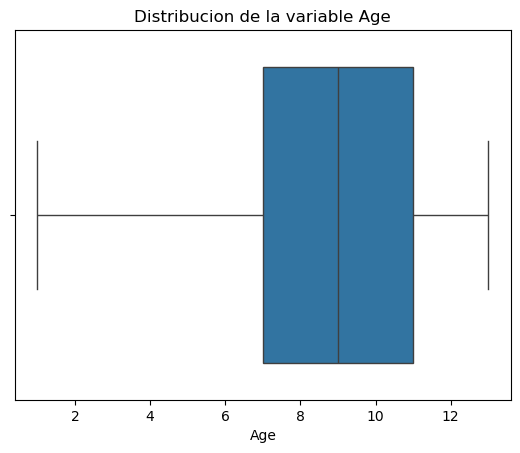

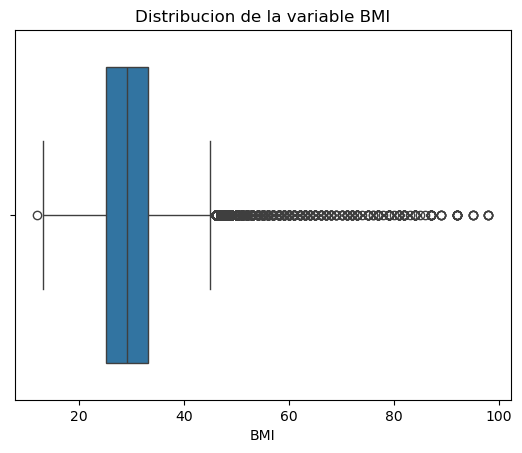

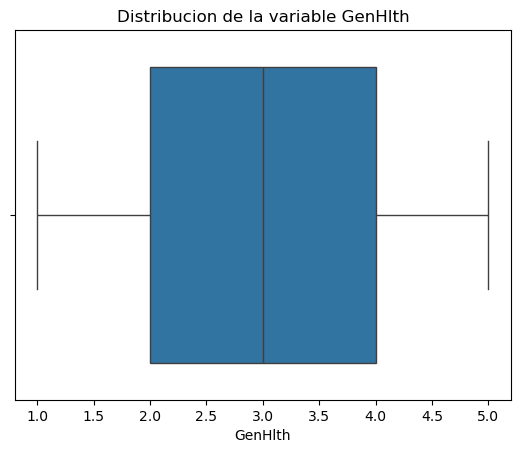

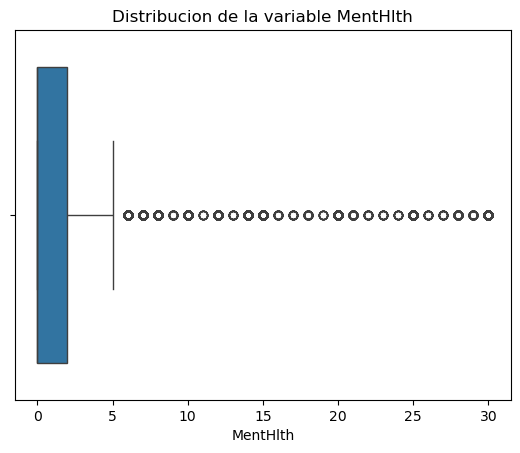

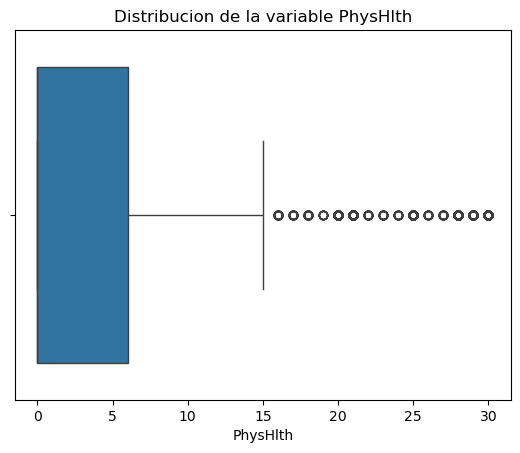

In [6]:
# Columnas binarias

binary_cols = ['Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

num_cols = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']


for i in num_cols:
    plt.figure()
    plt.clf()
    plt.title(f"Distribucion de la variable {i}")
    plt.xlabel(f"{i}")
    sns.boxplot(data=df, x=i)
    plt.show()

<Axes: >

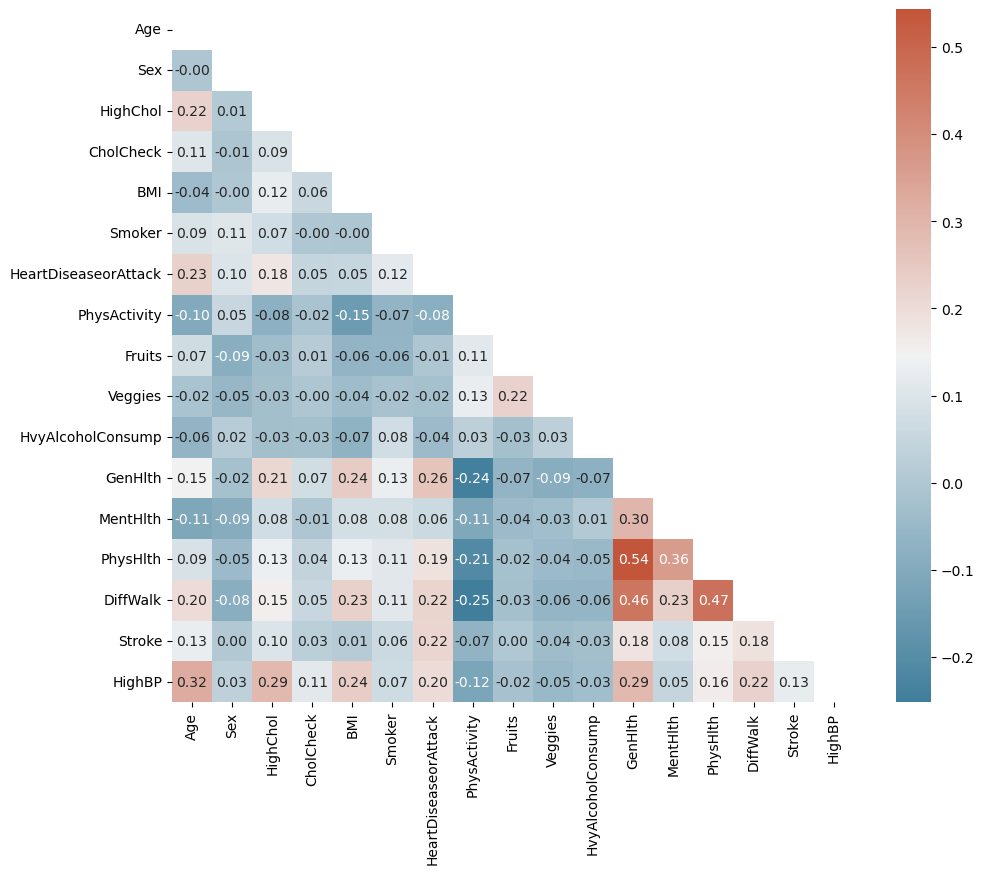

In [15]:
# Heatmap

corr = df.select_dtypes(include="number").drop(columns=
                                                    [
                                                    "Diabetes"
                                                    ]
                                                    ).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Figura
figure, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f")

**Comentarios PUNTO 1**:
- Hay 6672 registros duplicados.
- Las columnas ``Sex``, ``HighCho``', ``CholCheck``, ``Smoker``, ``HeartDiseaseorAttack``, ``PhysActivity``, ``Fruits``, ``Veggies``, ``HvyAlcoholConsump``, ``DiffWalk``, ``Stroke``, ``HighBP``, ``Diabetes``,  son columnas binarias.
- La muestra se concentra en niños. por lo que es muy poco probable los valores extremos en ``BMI``. Basándose en los límites según la [Organización mundial de la salud](https://en.wikipedia.org/wiki/Body_mass_index#/media/File:BMI_chart.png) , solo consideraremos registros con un BMI no mayor a 55. 
- Debido a que las variables numéricas tienen diferente escala: se propone estandarizar dichas variables con StandardScaler() para ``Age``, ``GenHealth`` y ``BMI``. Para las demás se aplicará RobustScaler()
- No se aplicará oneHotEncoder porque las otras columnas ya son binarias.

In [7]:
# Eliminación de valores de BMI.
df = df[df["BMI"] < 55]
df = df.drop_duplicates()
print("Dimensiones de df actual: ",  df.shape)

# ¿Hay desbalance de clases?
print("Porcentaje de cada clase \n")
print(df["Diabetes"].value_counts()/len(df["Diabetes"]))

Dimensiones de df actual:  (63496, 18)
Porcentaje de cada clase 

Diabetes
1.0    0.519907
0.0    0.480093
Name: count, dtype: float64


In [8]:
## PUNTO 2: creación de los dataset de entrenamiento y prueba.

df_x = df.drop(columns="Diabetes").copy()
df_y = df["Diabetes"]

# hay un desbalance leve pero igual usaremos stratify.

X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, random_state=42, test_size=0.33, shuffle=True, stratify=df_y
)

# PUNTO 3: Creación del column transformer:

rob_cols = ["MentHlth", "PhysHlth"]

sc_cols = ["Age", "BMI", "GenHlth"]


col_transformer = ColumnTransformer(
    transformers=[
        ("rob", RobustScaler(), rob_cols ),
        ("sc", StandardScaler(), sc_cols )
    ], remainder="passthrough", verbose_feature_names_out=False
)

col_transformer.set_output(transform="pandas")

# PUNTO 4:  Pipeline del modelo

xgb_pipeline = Pipeline(
    steps=[
        ("col_transformer", col_transformer),
        ("clasificador", XGBClassifier(random_state=7734))
    ]
)

# PUNTO 4: Entrenamiento y evaluación del modelo
xgb_pipeline.fit(X_train, y_train)

y_pred_train = xgb_pipeline.predict(X_train) # evaluar en entrenamiento: por si el modelo sobreajusta
y_pred_test = xgb_pipeline.predict(X_test)

# PUNTO 4: Métricas de desempeño.

print("Métricas de desempeño (conjunto de entrenamiento)\n ", classification_report(y_pred_train, y_train))
print("Métricas de desempeño (conjunto test)\n ", classification_report(y_pred_test, y_test))

Métricas de desempeño (conjunto de entrenamiento)
                precision    recall  f1-score   support

           0       0.72      0.80      0.76     18460
           1       0.83      0.77      0.80     24082

    accuracy                           0.78     42542
   macro avg       0.78      0.78      0.78     42542
weighted avg       0.79      0.78      0.78     42542

Métricas de desempeño (conjunto test)
                precision    recall  f1-score   support

           0       0.67      0.74      0.70      9041
           1       0.79      0.72      0.75     11913

    accuracy                           0.73     20954
   macro avg       0.73      0.73      0.73     20954
weighted avg       0.74      0.73      0.73     20954



### Respuesta a las preguntas de análisis.
1. *¿Es acaso un buen predictor de diabetes?*

    **R:** Para determinar si es un buen predictor de diabetes, nos fijamos que hay signos de sobreajuste ya que se hay mejor desempeño en el conjunto de entrenamiento que en el de testeo. Hay un ligero desbalance por lo que el accuracy no sería ideal para evaluar el desempeño. En este caso, nos fijamos en las métricas de la clase positiva, donde presenta un alto Precision (0.79), indicando que la tasa de falsos positivos es baja (Casos que no había diabetes pero el modelo dijo que si tenía), pero debido a la naturaleza del problema, también se busca que el Recall sea alto (que los falsos negativos sean bajos). En este caso, se obtuvo un recall de 0.72, lo que significa que el 72% de los casos, el modelo identifica correctamente a los que tienen diabetes. Pero hay un 28% de los pacientes que si tenían diabetes pero el modelo clasificó como pacientes sanos, lo cual es peligroso. Se obtiene entocnes una ponderación entre estas dos métricas con un f1-score de 0.75.
    Se concluye que el modelo es razonablemente bueno, pero tiene márgenes de errores razonables, sobre todo cuando se trata de los falsos negativos.

2. *¿Qué buscan explicar las métricas utilizadas?*

    **R:** Estas métricas utilizadas solo buscan mostrar la tasa de identificación de verdaderos positivos (negativos) y falsos positivos(negativos), es decir, cuántas veces el modelo acertó de manera correcta con los casos y por tanto, las métricas sirven para evaluar cierto desempeño del modelo. Nada más.

3. *¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?*

    **R:** No, las métricas mostradas solo indican que tan bien clasificó un modelo la totalidad de los casos. Estas métricas no dicen nada sobre la lógica interna del modelo; no dicen nada sobre que característica o feature fue primordial para que el modelo clasificara un caso como positivo o negativo. Luego, las métricas no asegura ni informa nada sobre la elección de las features para realizar la clasificación.



## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

Tabla de importancia según GAIN


,feature,importance
0,HighBP,63.867432
1,GenHlth,21.696825
2,CholCheck,10.661573
3,HighChol,10.126567
4,HvyAlcoholConsump,8.246614
5,Age,6.394932
6,BMI,5.299132
7,HeartDiseaseorAttack,4.662931
8,DiffWalk,3.874191
9,Stroke,3.461213


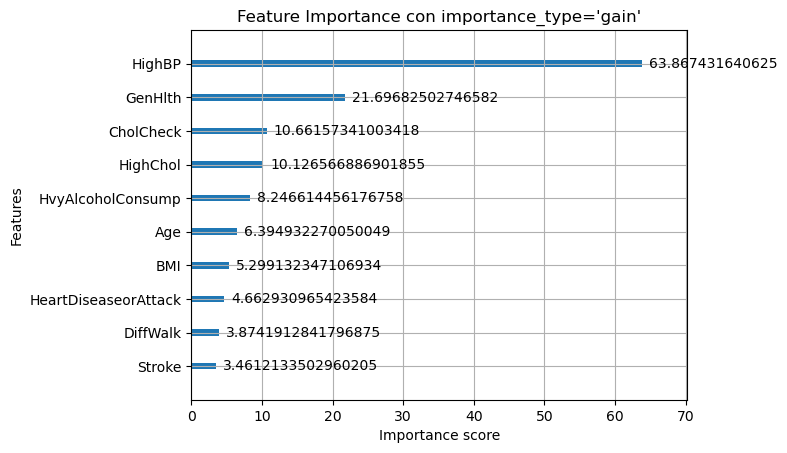

In [9]:
# Inserte su código aquí

####  PUNTO 1
xgb_model_gain = xgb_pipeline.named_steps["clasificador"]

# nombres de las columnas
feature_names = xgb_pipeline.named_steps["col_transformer"].get_feature_names_out()
feature_names = feature_names.tolist()

xgb_model_gain.get_booster().feature_names = feature_names

## GAIN
importance_gain = xgb_model_gain.get_booster().get_score(importance_type='gain')

# Se crea df para gain
importance_df_gain = (
    pd.DataFrame.from_dict(importance_gain, orient='index', columns=['importance'])
    .sort_values('importance', ascending=False)
)

importance_df_gain.reset_index(inplace=True)
importance_df_gain.rename(columns={'index': 'feature'}, inplace=True)

# tabla (gain)
print("Tabla de importancia según GAIN")
display(importance_df_gain.head(10))

# gráfico

xgb.plot_importance(xgb_model_gain, max_num_features=10, importance_type="gain")
plt.title("Feature Importance con importance_type='gain'")
plt.show()



Tabla de importancia según WEIGHT


,feature,importance
0,BMI,1082.0
1,Age,776.0
2,PhysHlth,678.0
3,MentHlth,591.0
4,GenHlth,401.0
5,Sex,187.0
6,HighChol,179.0
7,HighBP,168.0
8,PhysActivity,158.0
9,Smoker,158.0


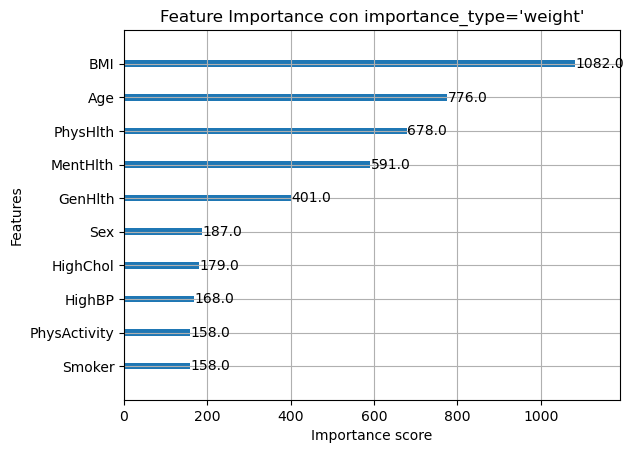

In [10]:
## WEIGHT
xgb_model_weight = xgb_pipeline.named_steps["clasificador"]
importance_weight = xgb_model_weight.get_booster().get_score(importance_type='weight')

# Se crea df 
importance_df_weight = (
    pd.DataFrame.from_dict(importance_weight, orient='index', columns=['importance'])
    .sort_values('importance', ascending=False)
)

importance_df_weight.reset_index(inplace=True)
importance_df_weight.rename(columns={'index': 'feature'}, inplace=True)

# tabla (weight)
print("Tabla de importancia según WEIGHT")
display(importance_df_weight.head(10))

# gráfico

xgb.plot_importance(xgb_model_weight, max_num_features=10, importance_type="weight")
plt.title("Feature Importance con importance_type='weight'")
plt.show()


Tabla de importancia según COVER


,feature,importance
0,CholCheck,2472.062988
1,HvyAlcoholConsump,1507.469604
2,BMI,1137.678833
3,MentHlth,980.421326
4,GenHlth,938.681030
5,Stroke,856.639099
6,PhysHlth,817.040100
7,HeartDiseaseorAttack,759.180420
8,Age,756.315979
9,HighChol,664.677490


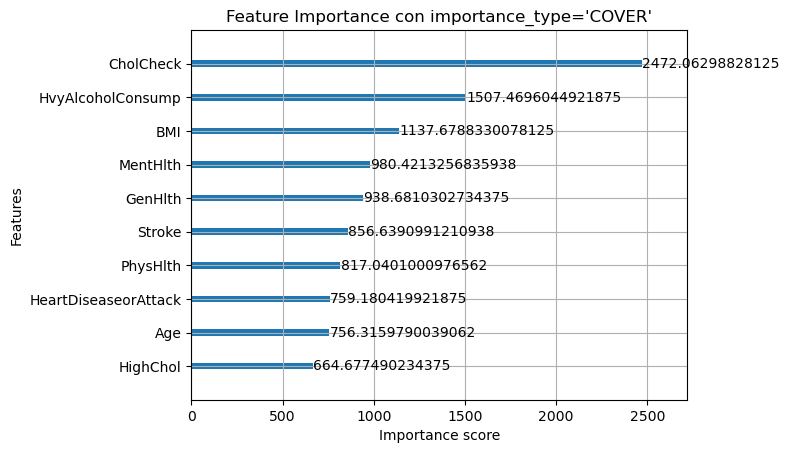

In [11]:
## COVER
xgb_model_cover = xgb_pipeline.named_steps["clasificador"]
importance_cover = xgb_model_cover.get_booster().get_score(importance_type='cover')

# Se crea df 
importance_df_cover = (
    pd.DataFrame.from_dict(importance_cover, orient='index', columns=['importance'])
    .sort_values('importance', ascending=False)
)

importance_df_cover.reset_index(inplace=True)
importance_df_cover.rename(columns={'index': 'feature'}, inplace=True)

# tabla (gain)
print("Tabla de importancia según COVER")
display(importance_df_cover.head(10))

# Gráfico
xgb.plot_importance(xgb_model_cover, max_num_features=10, importance_type="cover")
plt.title("Feature Importance con importance_type='COVER'")
plt.show()

### Respuestas a las preguntas de análisis.

2. *¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.*

    **R:** 
    - Comenzando con "gain", la cual indica la mejora promedio en la reducción de la impureza que aporta una característica cada vez que se hace una división. Luego una característica con una alta ganacia ayuda a dividir entre los diabéticos y los no diabéticos. En este caso, la feature ``HighBP`` fue la característica con la que se obtenía mayor ganancia (Después se sigue ``GenHlth``, ``CholCheck`` y ``HighChol``)

    - "Weight" toma en cuenta el número de veces en que una caracterítica es usada para hacer la división a lo largo de todos los árboles. Luego la feauture más importante es ``BMI``, seguido por ``Age``, ``PhysHlt`` y ``MentHlt``. Sorprende que la edad aparezca como una característica importante ya que igual el rango etario de los registros no es tan extendido (son todos niños)

    - "cover" Mide el número relativo de observaciones que son afectadas por las divisiones de un árbol según esta característica. Luego una característica con un alto cover es una feature que afecta a muchas de las predicciones del modelo. ``CholCheck`` es la característica que mayor "cover", seguido por ``HvyAlcoholConsump`` y ``BMI``. ``CholCheck`` la característica que afectaba a un gran número de observaciones al momento de realizar las divisiones.

    Estos resultados son compatibles en cierta medida, ya que ``BMI`` y ``CholCheck`` se declaran como características importantes al momento de realizar predicciones, lo cual igual eso tiene sentido a un nivel de salud: ``BMI``  tiene un alto "weight" y también un alto "cover" por lo que es una característica robusta, se usa frecuentemente y sus divisiones afectan a muchas observaciones. ``CholCheck`` tiene el "cover" más alto y aparece en el top 4 de "gain", luego esta feature no solo divide a muchas observaciones si no que cada división es muy informativa y útil.

    Sin embargo, hay diferencias en la importancia de las características según el método utilizado: ``HighBP`` es una feature que produce la mejor reducción de la impureza pero con "weight" muy bajo (lugar 8 en la tabla de importancia según weight), por lo que el modelo usa esta feature en instancias claves pero no en momentos donde se hagan pequeños ajustes.
    ``BMI`` Tiene un alto "weight" y una gain levemente alto, lo que significa que el modelo usa esta feature constantemente para refinar las predicciones.

    Las diferencias en los resultados es justamente por los diferentes enfoques de cada método: "gain" solo destaca a la feaute que produce la mejor redución de impureza de la clasificación (separa diabéticos de los no diabéticos en una isntancia), "weight"  entrega la característica que s eusa más frecuentemente s lo largo de todos los árboles. No mide la calidad de la división y "cover" solo ve que el alcance de una característica sobre las observacionesal momento de realizar una división.

3. *Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?* 

    **R:** Las importancias obtenidas No son suficientes par aobtener la interpretabilidad de un modelo que utiliza árboles. Lo que si permiten estas importancias es identificar de manera global aquellas características que inciden en las predicción de la clasificación y un uso de esto sería entrenar un nuevo modelo con característias reducidas para ver si el rendimiento del modelo se mantiene, empeora o en su mejor caso, que mejore. 
    Pero estas importancias no explican las predicciones individuales.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

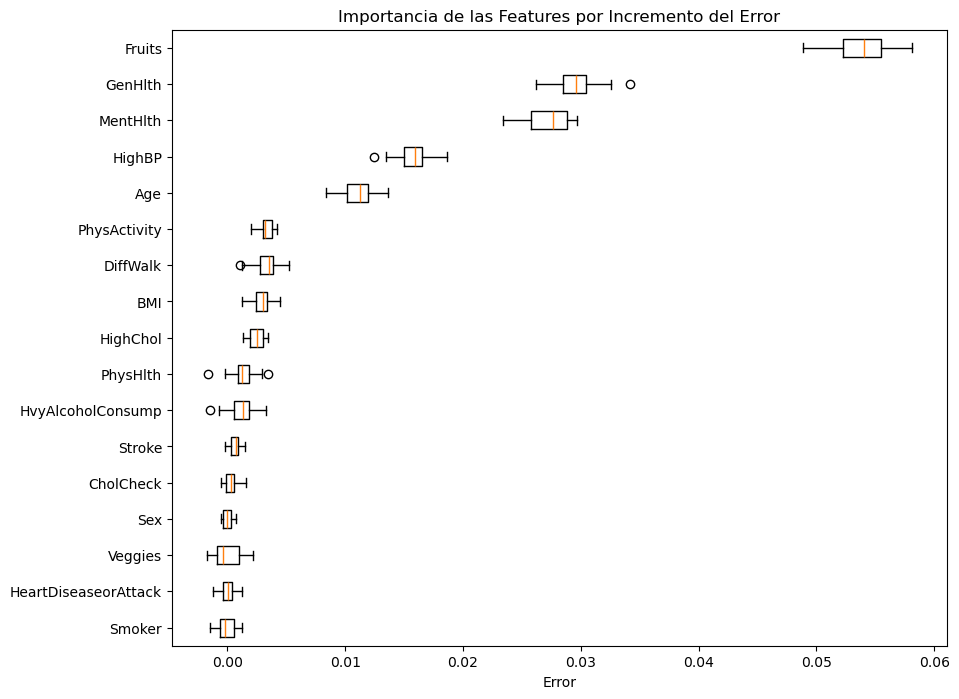

In [13]:
# Inserte su código aquí

# Importación de la librería
from sklearn.inspection import permutation_importance

# nombres de las columnas
feature_names = xgb_pipeline.named_steps["col_transformer"].get_feature_names_out(
)

# permutación
resultado = permutation_importance(
    xgb_pipeline, X_test, y_test, n_repeats=30, random_state=42)
perm_sorted_idx = resultado.importances_mean.argsort()

# gráfico
plt.figure(figsize=(10, 8))
plt.boxplot(
    resultado.importances[perm_sorted_idx].T,
    vert=False,
    tick_labels=np.array(feature_names)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()


In [14]:
resultado

{'importances_mean': array([ 2.72151697e-02,  1.25672107e-03,  1.11323216e-02,  2.89682161e-03,
         2.95218097e-02,  1.90894340e-05,  2.49594350e-03,  2.57707359e-04,
        -9.06748115e-05, -2.06802202e-05,  3.29769972e-03,  5.38687920e-02,
        -1.59078617e-06,  1.21854220e-03,  3.21975120e-03,  6.50631542e-04,
         1.57758264e-02]),
 'importances_std': array([0.00171203, 0.00094072, 0.00130806, 0.00072587, 0.00161569,
        0.00041286, 0.00062067, 0.00052606, 0.00074203, 0.00058614,
        0.0005879 , 0.00221778, 0.00110745, 0.00102687, 0.00097957,
        0.00044385, 0.00135262]),
 'importances': array([[ 2.78228501e-02,  2.90636633e-02,  2.72024434e-02,
          2.56752887e-02,  2.96840699e-02,  2.57230123e-02,
          2.75842321e-02,  2.37186217e-02,  2.51980529e-02,
          2.85864274e-02,  2.72978906e-02,  2.88250453e-02,
          2.76796793e-02,  2.88727689e-02,  2.33845566e-02,
          2.92068340e-02,  2.48162642e-02,  2.78228501e-02,
          2.89682

### Respuestas Análisis
 
2. *Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?)*

  **R:** En este gráfico se ve la distribución de los resultados en las 30 repeticiones hechas, ya que el proceso de permutar el totalmente aleatorio. Dentro de los boxplots, mientra haya mayor dispersión significa que el rendimiento del modelo fue muy variable en las diferentes repeticiones, mientras que en los boxplots de baja dispersión, significa que el rendimiento del modelo no se vio tan afectado. Luego la dispersión representa la consistencia del impacto de una característica.


4. Además, responda las siguientes preguntas:

  - ¿Cómo mide la importancia de las features su propuesta?

    **R:** Este método agnóstico mide la importancia de una feature. Se basa en la idea de que si una feature es importante, si es que se llega a romper su relación con la variable target, el modelo debe perder capacidad predictiva.

    La manera en que rompe dihca relación es permutando los valores de esa variable en el dataset, de modo que no tiene sentido con respecto a la salida, pero se conserva la distribución.

    A grandes rasgos, se tienen estos pasos:

      1. Se calcula el desempeño del modelo original en base a una métrica.
      2. Se permuta la variable y se predice de nuevo con el modelo.
      3. Se calcula la métrica escogida con la variable permutada.
      4. Se calcula la importancia que es la diferencia entre ambas métricas.
      5. Se repite para todas las variables.
    
    
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? 

    **R:** Según el gráfico, las features que tienen un mayor impacto son aquellas que presentan el mayor error, ya que al permutar los valores y romper la relación con la variable target, indica que la característica es muy importante. Luego se tiene que las características más importantes son (en orden) 
      * ``Fruits``: Presenta una gran dispersión, por lo que el renidmiento del modelo fue muy variable durante las repeticiones, pero fue la más importante. Esto es igual extraño ya que en los pasos anteriores esta característica no estuvo dentro de las top 10 más importantes (según gain, weight o cover.)
      *  ``GenHlt``: Es la segunda característica más importante. En algún momento o repetición, el rendimiento fue afectado notablemente (por la presencia del outlier a la derecha). Luego esta feature es importante y coincide con los resultados anteriores de la importancia de las features  (la segunda más importante en "gain" y quinta en "cover" y "weight")  
      * ``MentHlt``: Esta feature también es importante, donde su distribución está sesgada a la izquierda, donde la mayoría se los errores de las repeticiones se concentran por debajo de la mediana. Este resultado también tiene sentido ya que este feature aparecía en los resultados anteriores como importante.
      * ``HighBP``: El boxplot de esta característica es compacto en comparación a los anteriores, por lo que es una característica importante y es consistente con los resultados anteriores ya que fue la feature más importante con "gain". En algunas repeticiones (o en una), se obtuvo un outlier a la izquierda, significando que hubo un momento en que al permutar los valores de esta variable no afecto tanto el desempeño del modelo.
      *  ``Age``: Esta es la quinta feature importante según este método y coincide por lo menos con los resultados de la importancia según "weight".

      Hay características que se esperaban que influyeran más en las predicciones del modelo, como ``BMI`` y ``HighChol``. Hay algunas características, cuyas permutaciones ayudaron en el rendimiento del modelo (``Veggies``, ``HeartDiseaseorAttack`` y ``Smoker``), ya que en algún momento, el error que registraron algunas permutaciones quedaron debajo del 0 (tomaron valores negativos)

  - *¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?* 

    **R** Las conclusiones cambian notoriamente porque en base a los resultados anteriores ``BMI`` y ``HighBP`` se creían características importantes para la clasificación, pero ahora al parecer ``Fruits`` también lo es. Aunque también tiene sentido médico de que el estilo de vida influye notablemente si una persona sufrirá Diabetes o no, en ese caso, si ``Fruits`` es relevante, es cuestionable que ``veggies`` no lo sea según permutation features (Aunque mirando el correlograma, estas dos variables presentan una asociación débil) 
  

  - *Nombre y explique 3 ventajas y 3 desventajas del método implementado.*

    **R:** 
    * Ventajas:
      1. Es un modelo Agnóstico, por lo que sirve para árboles de decisión, SVM, redes neuronales, entre otros algoritmos.
      2. Es más fácil de intepretar.
      3. Considera interacciones directas.
    * Desventajas:
      1. Alto costo computacional.
      2. Colinealidad: si dos variables están muy correlacionadas, permutar una variable puede no afectar mucho porque hay otra variable que ya contiene toda la información.
      3. Se debe reaizar un número alto de repeticiones.


## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 38.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
# Inserte código para calcular shapley values aquí

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

In [ ]:
# Inserte código para generar gráficos de aporte local aquí

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

In [ ]:
# Inserte código para generar gráficos de aporte global aquí

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
# Inserte código para generar gráficos PDP aquí

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from alibi.explainers import AnchorTabular

2023-06-16 03:21:35.062920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 03:21:35.266905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-16 03:21:35.266966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-16 03:21:35.308521: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-16 03:21:38.061257: W tensorflow/stream_executor/platform/de

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>